In [1]:
# notebooks/01_EDA.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


SURVEY_PATH = r"D:\Soy Henry\Labs\Predicción de Sueldo y Rol en la Industria Tech con datos de Stack Overflow\survey_results_public.csv"
RAW_PATH = "../data/raw/survey_results_schema.csv"

# 📥 Leer archivos CSV
df = pd.read_csv(SURVEY_PATH, low_memory=False)
schema = pd.read_csv(RAW_PATH)


# 👀 Primer vistazo
print("Shape del dataset:", df.shape)
display(df.head(3))
display(df.info())

# Porcentaje de valores nulos por columna
missing = df.isnull().mean().sort_values(ascending=False)
display(missing[missing > 0])

# Columnas con mayor cantidad de datos únicos
unique_vals = df.nunique().sort_values(ascending=False)
display(unique_vals.head(10))



Shape del dataset: (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


None

AINextMuch less integrated    0.982456
AINextLess integrated         0.964011
AINextNo change               0.809007
AINextMuch more integrated    0.794642
EmbeddedAdmired               0.744288
                                ...   
YearsCode                     0.085089
NEWSOSites                    0.078717
LearnCode                     0.075630
EdLevel                       0.071107
AISelect                      0.069227
Length: 109, dtype: float64

ResponseId                      65437
LanguageHaveWorkedWith          23864
LanguageWantToWorkWith          22769
ToolsTechHaveWorkedWith         19883
ToolsTechWantToWorkWith         16549
NEWCollabToolsHaveWorkedWith    14168
LanguageAdmired                 12335
WebframeHaveWorkedWith          12235
ToolsTechAdmired                11804
WebframeWantToWorkWith          11654
dtype: int64

In [3]:
# Filtrar respuestas válidas
df_valid = df[df['ConvertedCompYearly'].notnull() & (df['Employment'] == 'Employed, full-time')]


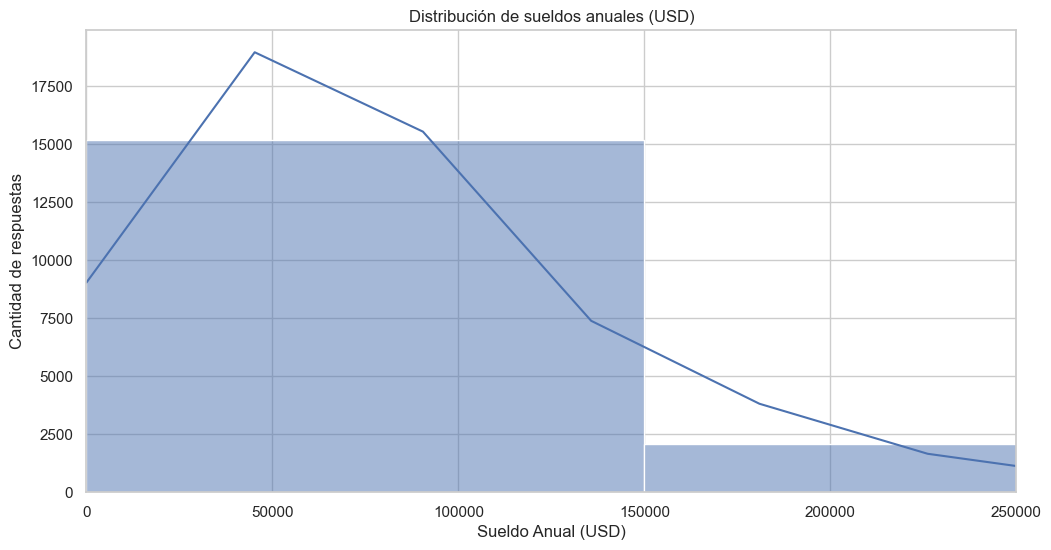

In [4]:
# Distribución salarial con recorte de outliers
sns.histplot(df_valid['ConvertedCompYearly'], bins=60, kde=True)
plt.xlim(0, 250000)
plt.title("Distribución de sueldos anuales (USD)")
plt.xlabel("Sueldo Anual (USD)")
plt.ylabel("Cantidad de respuestas")
plt.show()


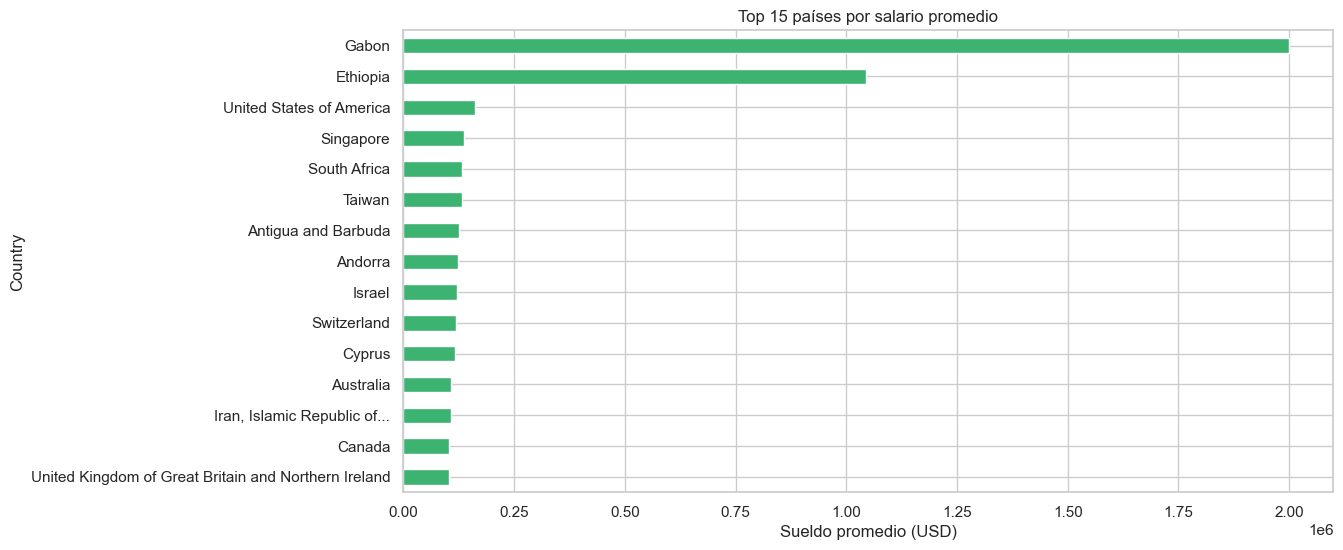

In [7]:
#Sueldo promedio por país (solo top 15)
df.groupby("Country")["ConvertedCompYearly"].mean().sort_values(ascending=False).head(15).plot(
    kind="barh", color="mediumseagreen")
plt.title("Top 15 países por salario promedio")
plt.xlabel("Sueldo promedio (USD)")
plt.gca().invert_yaxis()
plt.show()


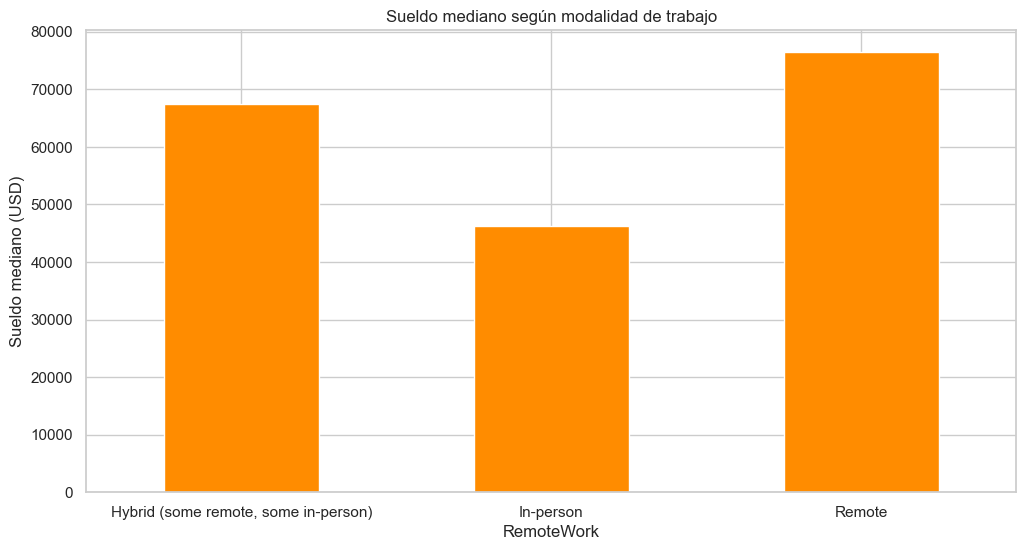

In [5]:
#¿Quiénes ganan más? Remoto vs presencial?
df.groupby("RemoteWork")["ConvertedCompYearly"].median().plot(kind="bar", color="darkorange")
plt.title("Sueldo mediano según modalidad de trabajo")
plt.ylabel("Sueldo mediano (USD)")
plt.xticks(rotation=0)
plt.show()


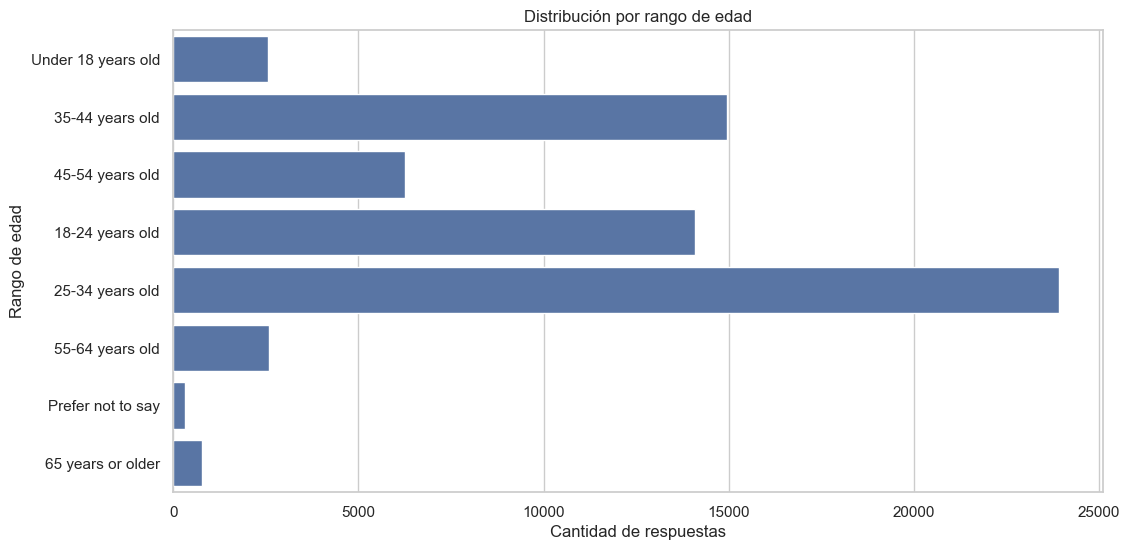

In [8]:
#Distribucion de edades
sns.countplot(y="Age", data=df)
plt.title("Distribución por rango de edad")
plt.xlabel("Cantidad de respuestas")
plt.ylabel("Rango de edad")
plt.show()


In [ ]:
#Selección de columnas clave
cols = ['DevType', 'Country', 'RemoteWork', 'LearnCode', 'ConvertedCompYearly']
df = df[cols]


In [ ]:
#Limpieza básica
df = df.dropna(subset=['DevType', 'Country', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] > 1000]  # Elimina ingresos irreales


In [8]:
df.to_csv('../data/processed/devs_limpios.csv', index=False)
